# Null Value Handling

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv(r"/home/jishnu/Desktop/data analytics/EDA/original - data_sets/imdb_top_1000.csv")

df = data.copy()
df["Meta_score"] = df["Meta_score"].fillna(df["Meta_score"].median())
df["Certificate"] = df["Certificate"].fillna(df["Certificate"].mode()[0])
df["Gross"] = df["Gross"].fillna(df["Gross"].mode()[0])

df.to_csv("filled_missing.csv",index=False) # used to save the modified copy file (filename.to_csv("newfile name",index = False)

df.drop('Poster_Link',axis = 1 , inplace = True) # used to remove unwanted columns

df.isnull().sum()


Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

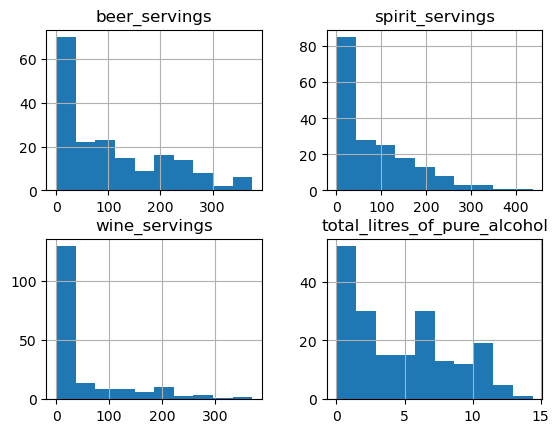

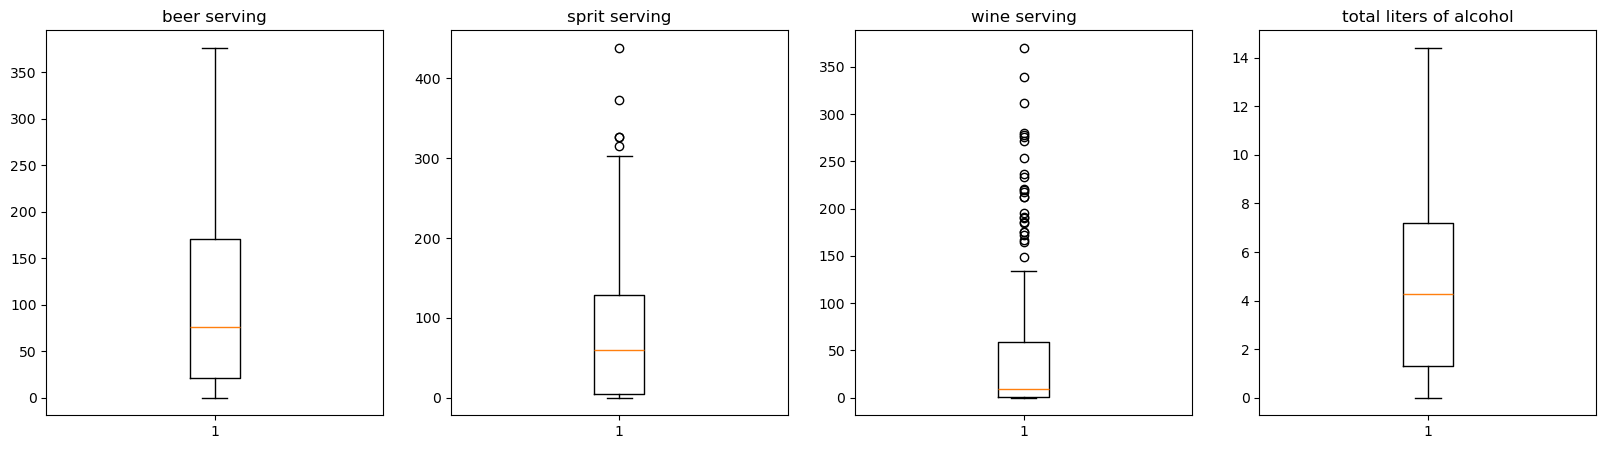

In [8]:
df2 = pd.read_csv(r"/home/jishnu/Desktop/data analytics/EDA/original - data_sets/beer-servings.csv")
df2.drop("Unnamed: 0",axis = 1 , inplace = True)
missing = df2.select_dtypes(["float"])
missing.hist()

for i in ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
    df2[i] = df2[i].fillna(df2[i].median())
df2[i]

col = ["beer_servings","spirit_servings","wine_servings","total_litres_of_pure_alcohol"]
tit = ["beer serving","sprit serving","wine serving","total liters of alcohol"]

fig,axs = plt.subplots(1,4,figsize = (20,5))

for i in range(4):
    axs[i].boxplot(df2[col[i]])
    axs[i].set_title(tit[i])

# Outlier Removing

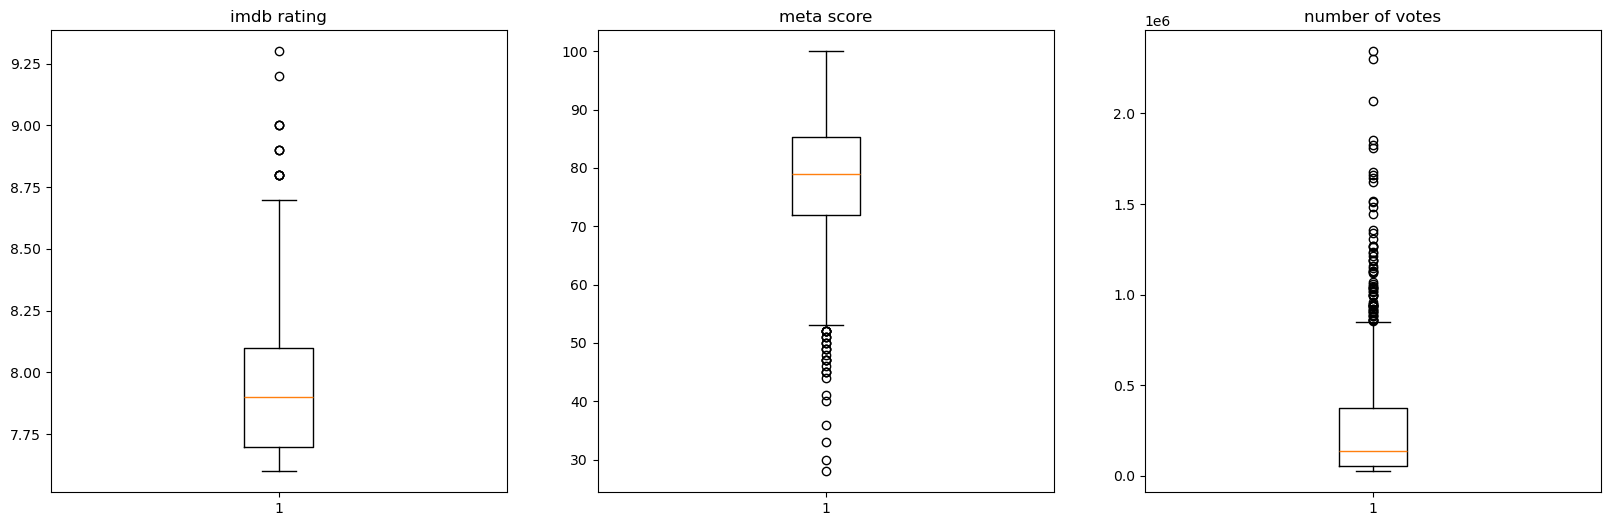

In [9]:
df3 = df.copy()
fig,axs = plt.subplots(1,3,figsize = (20,6))
columns = ["IMDB_Rating","Meta_score","No_of_Votes"]
title = ["imdb rating","meta score","number of votes"]

for i in range(3):
    axs[i].boxplot(df3[columns[i]])
    axs[i].set_title(title[i])


In [10]:
Q1 = np.percentile(df3["IMDB_Rating"],25,method="midpoint")
Q2 = np.percentile(df3["IMDB_Rating"],50,method = "midpoint")
Q3 = np.percentile(df3["IMDB_Rating"],75,method = "midpoint")
print(Q1)
print(Q2)
print(Q3)

7.7
7.9
8.1


In [11]:
def quartile(df,column):
    Q1 = np.percentile(df[column],25,method = "midpoint")
    Q2 = np.percentile(df[column],50,method = "midpoint")
    Q3 = np.percentile(df[column],75,method = "midpoint")
    return Q1,Q2,Q3

In [12]:
Q1,Q2,Q3 = quartile(df3,"IMDB_Rating")

IQR = Q3 - Q1
upper = Q3 + 1.5 *IQR
lower = Q1 - 1.5 * IQR
outliers = df3[(df3["IMDB_Rating"] > upper) | (df3["IMDB_Rating"] < lower)]["IMDB_Rating"].tolist()
df3 = df3[(df3["IMDB_Rating"] >= lower)&(df3["IMDB_Rating"] <= upper)]
outliers

[9.3, 9.2, 9.0, 9.0, 9.0, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.8, 8.8]

In [13]:
Q1,Q2,Q3 = quartile(df3,"Meta_score")
IQR = Q3 - Q1
upper = Q3 + 1.5 *IQR
lower = Q1 - 1.5 * IQR

outlier = df3[(df3["Meta_score"] > upper)|(df3["Meta_score"] < lower)]["Meta_score"].tolist()
df3 = df3[(df3["Meta_score"] >= lower)&(df3["Meta_score"] <= upper)]
outlier = df3[(df3["Meta_score"] > upper)|(df3["Meta_score"] < lower)]["Meta_score"].tolist()
outlier

[]

In [14]:
Q1,Q2,Q3 = quartile(df3,"No_of_Votes")
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
outlier = df3[(df3["No_of_Votes"] > upper) | (df3["No_of_Votes"] < lower)]["No_of_Votes"].tolist()
df3 = df3[(df3["No_of_Votes"] >= lower) & (df3["No_of_Votes"] <= upper)]
outlier = df3[(df3["No_of_Votes"] > upper) | (df3["No_of_Votes"] < lower)]["No_of_Votes"].tolist()
outlier

[]

In [15]:
df3.reset_index(drop = True , inplace = True)

In [16]:
df3.to_csv("cleaned_imdb.csv", index = False)

<Axes: ylabel='Meta_score'>

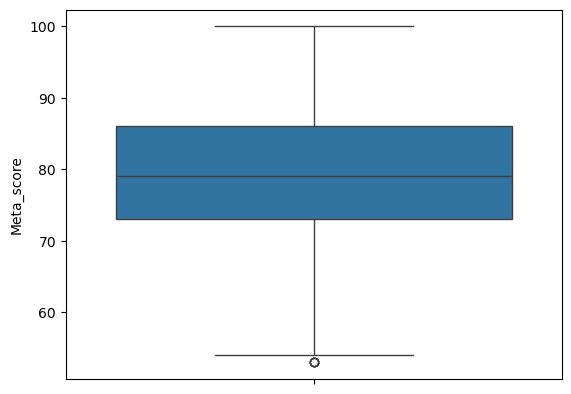

In [19]:
sns.boxplot(df3[""])